In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import glob
import json
import cv2

In [25]:
label = pd.read_csv('/kaggle/input/2023sumdpl302m/devset_images_gt.csv')
label


,id,label
0,3519864665,0
1,4896119055,0
2,3468473862,0
3,4120853942,0
4,4436083254,0
...,...,...
5275,8119782888,0
5276,6093294301,1
5277,6791185487,0
5278,9144682941,0


In [26]:
with open('/kaggle/input/2023sumdpl302m/devset_images_metadata.json') as f:
    data = json.load(f)
df = pd.DataFrame(data['images'])

In [27]:
df

,description,user_tags,title,license_name,user_nsid,image_extension_original,longitude,image_id,license_url,date_uploaded,date_taken,latitude,image_url,user_nickname,capture_device
0,None,"[2009 road trip, obrero road trip]",Biltmore Estate,Attribution-NonCommercial-NoDerivs License,95156977@N00,jpg,NaN,3519864665,http://creativecommons.org/licenses/by-nc-nd/2.0/,1242004112,2009-05-10 08:27:33.0,NaN,http://www.flickr.com/photos/95156977@N00/3519...,5 Flip-Flops (Earl),Canon EOS DIGITAL REBEL XT
1,None,"[daulatabad, daulatabad fort, ellora, road trip]",Chand Minar,Attribution-ShareAlike License,24574470@N00,jpg,75.200386,4896119055,http://creativecommons.org/licenses/by-sa/2.0/,1281931224,2010-08-14 13:35:10.0,19.939383,http://www.flickr.com/photos/24574470@N00/4896...,sankarshan,NIKON CORPORATION NIKON D90
2,"After the flood, the boarded up stores bear up...","[cedarrapids, createsouthroadtrip2009, disaste...",Uplifting Graffiti,Attribution License,73451168@N00,jpg,NaN,3468473862,http://creativecommons.org/licenses/by/2.0/,1240493762,2009-04-21 18:07:56.0,NaN,http://www.flickr.com/photos/73451168@N00/3468...,J Wynia,Panasonic DMC-TZ5
3,None,"[cork, enchente, flood, ireland, irlanda]",DSCF6487,Attribution-NonCommercial-NoDerivs License,12947023@N00,jpg,-8.621177,4120853942,http://creativecommons.org/licenses/by-nc-nd/2.0/,1258754762,2009-11-20 15:16:40.0,51.889603,http://www.flickr.com/photos/12947023@N00/4120...,guileite,FUJIFILM FinePix S6000fd
4,None,"[athens georgia, brown, current, flood, mud, r...",Oconoe river - flooded,Attribution License,60704492@N00,jpg,-83.368265,4436083254,http://creativecommons.org/licenses/by/2.0/,1268676971,2010-03-13 15:14:04.0,33.949149,http://www.flickr.com/photos/60704492@N00/4436...,The_Gut,Canon PowerShot SX10 IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,None,"[550d, camino, canon, canoneos550d, canoneoski...",90,Attribution-NonCommercial-NoDerivs License,77410280@N02,jpg,-2.054529,8119782888,http://creativecommons.org/licenses/by-nc-nd/2.0/,1351102451,2012-08-24 15:45:44.0,43.311345,http://www.flickr.com/photos/77410280@N02/8119...,Guillermo Santander,Canon EOS 550D
5276,None,"[albany, ny, flood, walk, water]","Albany's Corning Preserve, day after Irene",Attribution-NonCommercial-ShareAlike License,72996797@N00,jpg,NaN,6093294301,http://creativecommons.org/licenses/by-nc-sa/2.0/,1314640488,2011-08-29 12:28:43.0,NaN,http://www.flickr.com/photos/72996797@N00/6093...,fixlr,HTC HERO200
5277,None,"[al, the waters in pike road]",IMG_4989,Attribution-NonCommercial License,32093753@N07,jpg,NaN,6791185487,http://creativecommons.org/licenses/by-nc/2.0/,1327953468,2009-04-28 01:13:58.0,NaN,http://www.flickr.com/photos/32093753@N07/6791...,ThreeRiversRecon,Canon EOS DIGITAL REBEL XTi
5278,2013 Fair Flood,"[2013, county, fair, flood, linn]",IMG_3011,Attribution-NonCommercial-ShareAlike License,65383126@N03,jpg,NaN,9144682941,http://creativecommons.org/licenses/by-nc-sa/2.0/,1372279879,2013-06-26 15:48:00.0,NaN,http://www.flickr.com/photos/65383126@N03/9144...,Linn County Fair,Canon EOS DIGITAL REBEL XSi


In [28]:
def check_character(word, target):
    try:
        if word in (''.join(target)).lower(): return 1
        else: return 0
    except:
        return 0

In [29]:
x = []
for i in tqdm(range(len(label))):
    #image = Image.open(f"/kaggle/working/devset_images/{label['id'][i]}.jpg").convert("L")
    #image = cv2.imread(f"/kaggle/working/devset_images/{label['id'][i]}.jpg", cv2.IMREAD_COLOR)
    img_id = label['id'][i]
    filename = next((f'/kaggle/input/2023sumdpl302m/devset_images/devset_images/{img_id}.{ext}' \
                 for ext in ['jpg', 'png', 'gif'] \
                 if os.path.isfile(f'/kaggle/input/2023sumdpl302m/devset_images/devset_images/{img_id}.{ext}')), None)
    image = Image.open(filename)

    image = image.resize((150, 150))
    #image = np.resize(image, (150, 150, 3))

    arr = np.array(image).reshape(150, 150, 3)
    x.append(arr)
x = np.array(x)
_, wid, hei, chan = x.shape
np.save(f'x_train_{wid}x{hei}x{chan}.npy', x)

100%|██████████| 5280/5280 [00:32<00:00, 164.02it/s]


In [30]:
x.shape

(5280, 150, 150, 3)

In [31]:
train_label = []
for i in tqdm(range(len(label))): 
    train_label.append(label['label'][i])
train_label = np.array(train_label)

100%|██████████| 5280/5280 [00:00<00:00, 86627.99it/s]


In [32]:
# flood_presence_train = []
# for i in tqdm(range(len(label))):
#     cate = []
#     cate.append(check_character('flood', df['title'][i]))
#     cate.append(check_character('flood', df['description'][i]))
#     cate.append(check_character('flood', df['user_tags'][i]))
#     flood_presence_train.append(cate)
# binary_train = np.array(flood_presence_train)

flood_presence_train = []
for i in tqdm(range(len(label))):
    cate = []
    if check_character('flood', df['title'][i]) or \
        check_character('flood', df['description'][i]) or\
        check_character('flood', df['user_tags'][i]):
        cate.append(1)
    else: cate.append(0)
    flood_presence_train.append(cate)
binary_train = np.array(flood_presence_train)
binary_train.shape

100%|██████████| 5280/5280 [00:00<00:00, 27848.07it/s]


(5280, 1)

In [ ]:
title_train = []
desc_train = []
tag_train = []
for i in tqdm(range(len(label))):
    title_train.append(check_character('flood', df['title'][i]))
    desc_train.append(check_character('flood', df['description'][i]))
    tag_train.append(check_character('flood', df['user_tags'][i]))
title_train = np.array(title_train)
desc_train = np.array(desc_train)
tag_train = np.array(tag_train)

In [10]:
binary_train.shape

(5280, 1)

In [33]:
test_data = pd.read_csv('/kaggle/input/2023sumdpl302m/test.csv')
test_data

,image_id,title,description,user_tags
0,3483809003,"Flooded Parking Lot At Emily Fowler Library, A...",Denton Creek overflows its banks and floods Oa...,"project, slis 5715, spring 2009"
1,3712805295,L'arc de Barà / The roman arch of Barà,Sembla que fou dedicat a August entorn l'any 1...,"arc, arc_de_berà, arch, archaeology, arco, arq..."
2,379845620,Highest point over the sea level that is reach...,NaN,NaN
3,7343264988,Lagos after the rains,"After heavy rain, Lagos (Nigeria) was still fl...","africa, lagos, nigeria"
4,3843337492,flooded Corley Ave,also a local black out due to the tree branch ...,"flood, storm, toronto"
...,...,...,...,...
1315,6452132743,Landscapes and cityscapes: daily dose of ugliness,You can find more like this in my Landscapes a...,"bouw, bus station, commuting, construction, da..."
1316,244899140,A cool looking building the the Parque Central,NaN,"guatemala, xela"
1317,3073018258,Just Plain Wet,I liked the reflection of the trees on the wet...,"driving, fall, me, november, photographing, ra..."
1318,49525361,... Palmer,Looking up toward Magnolia. Our neighbor's hou...,"hurricane katrina, new orleans, post katrina"


In [34]:
x_test = []
for i in tqdm(range(len(test_data))):
    #image = Image.open(f"/kaggle/working/testset_images/{test_data['image_id'][i]}.jpg").convert('L')
    #image = cv2.imread(f"/kaggle/working/testset_images/{test_data['image_id'][i]}.jpg", cv2.IMREAD_COLOR)
    #image = Image.open(f"/kaggle/working/testset_images/{test_data['image_id'][i]}.jpg")
    img_id = test_data['image_id'][i]
    filename = next((f'/kaggle/input/2023sumdpl302m/testset_images/testset_images/{img_id}.{ext}' \
                 for ext in ['jpg', 'png', 'gif'] \
                 if os.path.isfile(f'/kaggle/input/2023sumdpl302m/testset_images/testset_images/{img_id}.{ext}')), None)
    image = Image.open(filename)

    image = image.resize((150, 150))
    #image = np.resize(image, (150, 150, 3))

    arr = np.array(image).reshape(150, 150, 3)
    x_test.append(arr)
    
x_test = np.array(x_test)
_, wid, hei, chan = x_test.shape
np.save(f'x_test_{wid}x{hei}x{chan}.npy', x_test)

100%|██████████| 1320/1320 [00:08<00:00, 163.48it/s]


In [35]:
# flood_presence_test = []
# for i in tqdm(range(len(test_data))):
#     cate = []
#     cate.append(check_character('flood', test_data['title'][i]))
#     cate.append(check_character('flood', test_data['description'][i]))
#     cate.append(check_character('flood', test_data['user_tags'][i]))
#     flood_presence_test.append(cate)
# binary_test = np.array(flood_presence_test)

flood_presence_test = []
for i in tqdm(range(len(test_data))):
    cate = []
    if check_character('flood', test_data['title'][i]) or \
        check_character('flood', test_data['description'][i]) or\
        check_character('flood', test_data['user_tags'][i]):
        cate.append(1)
    else: cate.append(0)
    flood_presence_test.append(cate)
binary_test = np.array(flood_presence_test)
binary_test.shape

100%|██████████| 1320/1320 [00:00<00:00, 26094.68it/s]


(1320, 1)

In [7]:
prediction = flood_presence_test
prediction = [int(num[0]) for num in prediction]
result_df = pd.DataFrame({'id':test_data['image_id'].tolist(),'label':prediction})
result_df

,id,label
0,3483809003,1
1,3712805295,0
2,379845620,0
3,7343264988,1
4,3843337492,1
...,...,...
1315,6452132743,0
1316,244899140,0
1317,3073018258,0
1318,49525361,1


In [14]:
binary_test.shape

(1320, 1)

In [ ]:
title_test = []
desc_test = []
tag_test = []
for i in tqdm(range(len(test_data))):
    title_test.append(check_character('flood', test_data['title'][i]))
    desc_test.append(check_character('flood', test_data['description'][i]))
    tag_test.append(check_character('flood', test_data['user_tags'][i]))
title_test = np.array(title_test)
desc_test = np.array(desc_test)
tag_test = np.array(tag_test)

In [15]:
binary_test.shape

(1320, 1)

In [36]:
y = np.array(train_label)

y = y.reshape(-1, 1)

print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (5280, 150, 150, 3)
y shape: (5280, 1)


In [ ]:
y_pred = y_pred.astype('float32')
binary_input = y_pred.reshape(y_pred.shape[0],1)

In [ ]:
binary_input

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Lambda
from tensorflow.keras import regularizers
from keras.optimizers import Adam

@tf.function
def binary_threshold(x):
    return tf.cast(tf.greater_equal(x, 0.5), tf.float32)


input_shape = (112, 112, 1)


image_input = Input(shape=input_shape)
binary_input = Input(shape=(1,))
#title_input = Input(shape=(1,))
#desc_input = Input(shape=(1,))
#tag_input = Input(shape=(1,))

# Add convolutional and pooling layers to extract features from the image
conv1 = Conv2D(32, (3, 3), activation='relu')(image_input)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(pool2)
pool3 = MaxPooling2D((2, 2))(conv3)

# Flatten the output from the convolutional layers
flatten = Flatten()(pool3)

# Add a fully connected layer for classification
dense1 = Dense(128, activation='relu')(flatten)
#dense1 = Dropout(0.5)(dense1)
cnn_output = Dense(1, activation='sigmoid')(dense1)
#cnn_output = Lambda(binary_threshold)(cnn_output)

# Original dont delete
concat = keras.layers.concatenate([cnn_output, binary_input])

# Last dense layer
dense2 = Dense(128, activation='relu')(concat)
#dense2 = Dropout(0.5)(dense2)
output = Dense(1, activation='sigmoid')(dense2)

# Define the model input and output
model = Model(inputs=[image_input, binary_input], outputs=output)
#model = Model(inputs=[image_input, title_input, desc_input, tag_input], outputs=output)

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train_img, X_dev_img, X_train_bin, X_dev_bin, y_train, y_dev = train_test_split(x, binary_train, y, test_size=0.2)

x_train = [X_train_img, X_train_bin]
x_dev = [X_dev_img, X_dev_bin]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_img, X_dev_img, X_train_bin, X_dev_bin, y_train, y_dev = \
            train_test_split(x, binary_input, y, test_size=0.2)

x_train = [X_train_img, X_train_bin]
x_dev = [X_dev_img, X_dev_bin]

In [ ]:
#history = model.fit([x, title_train, desc_train, tag_train], y, epochs=20, batch_size=16, callbacks=[checkpoint])
#history = model.fit([x, binary_train], y, epochs=20, batch_size=16, callbacks=[checkpoint])
history = model.fit(x_train, y_train, validation_data=(x_dev, y_dev), epochs=20, batch_size=32, callbacks=[checkpoint])

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss_values) + 1)

fig, axs = plt.subplots(2,2)

axs[0,0].plot(epochs, loss_values)
axs[0,0].set_title('loss_values')
axs[0,1].plot(epochs, val_loss_values)
axs[0,1].set_title('val_loss_values')
axs[1,0].plot(epochs, acc_values)
axs[1,0].set_title('acc_values')
axs[1,1].plot(epochs, val_acc_values)
axs[1,1].set_title('val_acc_values')

In [ ]:
model.load_weights('best_weights.h5')

In [ ]:
y_svm_pred = svm_model.predict(X_test)
y_svm_pred = y_svm_pred.astype('float32')
binary_test = y_svm_pred.reshape(y_svm_pred.shape[0],1)

In [ ]:
binary_test.shape

In [ ]:
x_test.shape

In [ ]:
result = model.predict([x_test, binary_test])

In [ ]:
result[result >= 0.5] = 1
result[result < 0.5] = 0

In [ ]:
prediction = result.tolist()
prediction = [int(num[0]) for num in prediction]

In [ ]:
result_df = pd.DataFrame({'id':test_data['image_id'].tolist(),'label':prediction})
result_df

In [ ]:
result_df.to_csv('result.csv',index = False)

⣿⣿⣿⣿⣿⣿⡷⣯⢿⣿⣷⣻⢯⣿⡽⣻⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⠸⣿⣿⣆⠹⣿⣿⢾⣟⣯⣿⣿⣿⣿⣿⣿⣽⣻⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣻⣽⡿⣿⣎⠙⣿⣞⣷⡌⢻⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣿⡄⠹⣿⣿⡆⠻⣿⣟⣯⡿⣽⡿⣿⣿⣿⣿⣽⡷⣯⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣟⣷⣿⣿⣿⡀⠹⣟⣾⣟⣆⠹⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⢠⡘⣿⣿⡄⠉⢿⣿⣽⡷⣿⣻⣿⣿⣿⣿⡝⣷⣯⢿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣯⢿⣾⢿⣿⡄⢄⠘⢿⣞⡿⣧⡈⢷⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⢸⣧⠘⣿⣷⠈⣦⠙⢿⣽⣷⣻⣽⣿⣿⣿⣿⣌⢿⣯⢿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣟⣯⣿⢿⣿⡆⢸⡷⡈⢻⡽⣷⡷⡄⠻⣽⣿⣿⡿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣏⢰⣯⢷⠈⣿⡆⢹⢷⡌⠻⡾⢋⣱⣯⣿⣿⣿⣿⡆⢻⡿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⡎⣿⢾⡿⣿⡆⢸⣽⢻⣄⠹⣷⣟⣿⣄⠹⣟⣿⣿⣟⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⡇⢸⣯⣟⣧⠘⣷⠈⡯⠛⢀⡐⢾⣟⣷⣻⣿⣿⣿⡿⡌⢿⣻⣿⣿
⣿⣿⣿⣿⣿⣿⣧⢸⡿⣟⣿⡇⢸⣯⣟⣮⢧⡈⢿⣞⡿⣦⠘⠏⣹⣿⣽⢿⣿⣿⣿⣿⣯⣿⣿⣿⡇⢸⣿⣿⣾⡆⠹⢀⣠⣾⣟⣷⡈⢿⣞⣯⢿⣿⣿⣿⢷⠘⣯⣿⣿
⣿⣿⣿⣿⣿⣿⣿⡈⣿⢿⣽⡇⠘⠛⠛⠛⠓⠓⠈⠛⠛⠟⠇⢀⢿⣻⣿⣯⢿⣿⣿⣿⣷⢿⣿⣿⠁⣾⣿⣿⣿⣧⡄⠇⣹⣿⣾⣯⣿⡄⠻⣽⣯⢿⣻⣿⣿⡇⢹⣾⣿
⣿⣿⣿⣿⣿⣿⣿⡇⢹⣿⡽⡇⢸⣿⣿⣿⣿⣿⣞⣆⠰⣶⣶⡄⢀⢻⡿⣯⣿⡽⣿⣿⣿⢯⣟⡿⢀⣿⣿⣿⣿⣿⣧⠐⣸⣿⣿⣷⣿⣿⣆⠹⣯⣿⣻⣿⣿⣿⢀⣿⢿
⣿⣿⣿⣿⣿⣿⣿⣿⠘⣯⡿⡇⢸⣿⣿⣿⣿⣿⣿⣿⣧⡈⢿⣳⠘⡄⠻⣿⢾⣽⣟⡿⣿⢯⣿⡇⢸⣿⣿⣿⣿⣿⣿⡀⢾⣿⣿⣿⣿⣿⣿⣆⠹⣾⣷⣻⣿⡿⡇⢸⣿
⣿⣿⣿⣿⣿⣿⣿⣿⡇⢹⣿⠇⢸⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠻⡇⢹⣆⠹⣟⣾⣽⣻⣟⣿⣽⠁⣾⣿⣿⣿⣿⣿⣿⣇⣿⣿⠿⠛⠛⠉⠙⠋⢀⠁⢘⣯⣿⣿⣧⠘⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⡈⣿⡃⢼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⡙⠌⣿⣆⠘⣿⣞⡿⣞⡿⡞⢠⣿⣿⣿⣿⣿⡿⠛⠉⠁⢀⣀⣠⣤⣤⣶⣶⣶⡆⢻⣽⣞⡿⣷⠈⣿
⣿⣿⣿⣿⣿⣿⣿⣿⡿⠃⠘⠁⠉⠉⠉⠉⠉⠉⠉⠉⠉⠙⠛⠛⢿⣄⢻⣿⣧⠘⢯⣟⡿⣽⠁⣾⣿⣿⣿⣿⣿⡃⢀⢀⠘⠛⠿⢿⣻⣟⣯⣽⣻⣵⡀⢿⣯⣟⣿⢀⣿
⣿⣿⣿⣟⣿⣿⣿⣿⣶⣶⡆⢀⣿⣾⣿⣾⣷⣿⣶⠿⠚⠉⢀⢀⣤⣿⣷⣿⣿⣷⡈⢿⣻⢃⣼⣿⣿⣿⣿⣻⣿⣿⣿⡶⣦⣤⣄⣀⡀⠉⠛⠛⠷⣯⣳⠈⣾⡽⣾⢀⣿
⣿⢿⣿⣿⣻⣿⣿⣿⣿⣿⡿⠐⣿⣿⣿⣿⠿⠋⠁⢀⢀⣤⣾⣿⣿⣿⣿⣿⣿⣿⣿⣌⣥⣾⡿⣿⣿⣷⣿⣿⢿⣷⣿⣿⣟⣾⣽⣳⢯⣟⣶⣦⣤⡾⣟⣦⠘⣿⢾⡁⢺
⣿⣻⣿⣿⡷⣿⣿⣿⣿⣿⡗⣦⠸⡿⠋⠁⢀⢀⣠⣴⢿⣿⣽⣻⢽⣾⣟⣷⣿⣟⣿⣿⣿⣳⠿⣵⣧⣼⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣽⣳⣯⣿⣿⣿⣽⢀⢷⣻⠄⠘
⣿⢷⣻⣿⣿⣷⣻⣿⣿⣿⡷⠛⣁⢀⣀⣤⣶⣿⣛⡿⣿⣮⣽⡻⣿⣮⣽⣻⢯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⢀⢸⣿⢀⡆
⠸⣟⣯⣿⣿⣷⢿⣽⣿⣿⣷⣿⣷⣆⠹⣿⣶⣯⠿⣿⣶⣟⣻⢿⣷⣽⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢀⣯⣟⢀⡇
⣇⠹⣟⣾⣻⣿⣿⢾⡽⣿⣿⣿⣿⣿⣆⢹⣶⣿⣻⣷⣯⣟⣿⣿⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⢀⡿⡇⢸⡇
⣿⣆⠹⣷⡻⣽⣿⣯⢿⣽⣻⣿⣿⣿⣿⣆⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠛⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⢸⣿⠇⣼⡇
⡙⠾⣆⠹⣿⣦⠛⣿⢯⣷⢿⡽⣿⣿⣿⣿⣆⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠃⠎⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⢀⣿⣾⣣⡿⡇
⣿⣷⡌⢦⠙⣿⣿⣌⠻⣽⢯⣿⣽⣻⣿⣿⣿⣧⠩⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡏⢰⢣⠘⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠃⢀⢀⢿⣞⣷⢿⡇
⣿⣽⣆⠹⣧⠘⣿⣿⡷⣌⠙⢷⣯⡷⣟⣿⣿⣿⣷⡀⡹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣈⠃⣸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠟⢀⣴⡧⢀⠸⣿⡽⣿⢀
⢻⣽⣿⡄⢻⣷⡈⢿⣿⣿⢧⢀⠙⢿⣻⡾⣽⣻⣿⣿⣄⠌⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠛⢁⣰⣾⣟⡿⢀⡄⢿⣟⣿⢀
⡄⢿⣿⣷⢀⠹⣟⣆⠻⣿⣿⣆⢀⣀⠉⠻⣿⡽⣯⣿⣿⣷⣈⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠋⢀⣠⠘⣯⣷⣿⡟⢀⢆⠸⣿⡟⢸
⣷⡈⢿⣿⣇⢱⡘⢿⣷⣬⣙⠿⣧⠘⣆⢀⠈⠻⣷⣟⣾⢿⣿⣆⠹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠋⣠⡞⢡⣿⢀⣿⣿⣿⠇⡄⢸⡄⢻⡇⣼
⣿⣷⡈⢿⣿⡆⢣⡀⠙⢾⣟⣿⣿⣷⡈⠂⠘⣦⡈⠿⣯⣿⢾⣿⣆⠙⠻⠿⠿⠿⠿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⠛⢋⣠⣾⡟⢠⣿⣿⢀⣿⣿⡟⢠⣿⢈⣧⠘⢠⣿
⣿⣿⣿⣄⠻⣿⡄⢳⡄⢆⡙⠾⣽⣿⣿⣆⡀⢹⡷⣄⠙⢿⣿⡾⣿⣆⢀⡀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⣀⣠⣴⡿⣯⠏⣠⣿⣿⡏⢸⣿⡿⢁⣿⣿⢀⣿⠆⢸⣿
⣿⣿⣿⣿⣦⡙⣿⣆⢻⡌⢿⣶⢤⣉⣙⣿⣷⡀⠙⠽⠷⠄⠹⣿⣟⣿⣆⢙⣋⣤⣤⣤⣄⣀⢀⢀⢀⢀⣾⣿⣟⡷⣯⡿⢃⣼⣿⣿⣿⠇⣼⡟⣡⣿⣿⣿⢀⡿⢠⠈⣿
⣿⣿⣿⣿⣿⣷⣮⣿⣿⣿⡌⠁⢤⣤⣤⣤⣬⣭⣴⣶⣶⣶⣆⠈⢻⣿⣿⣆⢻⣿⣿⣿⣿⣿⣿⣷⣶⣤⣌⣉⡘⠛⠻⠶⣿⣿⣿⣿⡟⣰⣫⣴⣿⣿⣿⣿⠄⣷⣿⣿⣿

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
df['user_tags'] = df['user_tags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['description'] = df['description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['title'] = df['title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

df['combined'] = df['user_tags'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['title'].fillna('')

stop_words = ['a', 'an', 'the', 'and', 'or', 'not']
df['preprocessed'] = df['combined'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)
df['preprocessed'] = df['preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
test_data['user_tags'] = test_data['user_tags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
test_data['description'] = test_data['description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
test_data['title'] = test_data['title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

test_data['combined'] = test_data['user_tags'].fillna('') + ' ' + test_data['description'].fillna('') + ' ' + test_data['title'].fillna('')

stop_words = ['a', 'an', 'the', 'and', 'or', 'not']
test_data['preprocessed'] = test_data['combined'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)
test_data['preprocessed'] = test_data['preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df['preprocessed'])
y_train = label['label']
X_test = vectorizer.transform(test_data['preprocessed'])

svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_train, y_train)


In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
prediction_nlp = y_pred.tolist()
prediction_nlp

In [ ]:
result_df_nlp = pd.DataFrame({'id':test_data['image_id'].tolist(),'label':prediction_nlp})
result_df_nlp

In [ ]:
result_df_nlp.to_csv('result.csv',index = False)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
y_train = np.array(y_train)
X_test = X_test.toarray()
X_train = X_train.toarray()

In [ ]:
X_train.shape

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
X_test.shape

In [ ]:
import tensorflow as tf

In [ ]:
result = model.predict(X_test)

In [ ]:
result[result >= 0.5] = 1
result[result < 0.5] = 0

In [ ]:
prediction = result.tolist()
prediction = [int(num[0]) for num in prediction]
result_df = pd.DataFrame({'id':test_data['image_id'].tolist(),'label':prediction})
result_df

In [ ]:
result_df.to_csv('result.csv',index = False)

⣿⣿⣿⣿⣿⣿⡷⣯⢿⣿⣷⣻⢯⣿⡽⣻⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⠸⣿⣿⣆⠹⣿⣿⢾⣟⣯⣿⣿⣿⣿⣿⣿⣽⣻⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣻⣽⡿⣿⣎⠙⣿⣞⣷⡌⢻⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣿⡄⠹⣿⣿⡆⠻⣿⣟⣯⡿⣽⡿⣿⣿⣿⣿⣽⡷⣯⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣟⣷⣿⣿⣿⡀⠹⣟⣾⣟⣆⠹⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⢠⡘⣿⣿⡄⠉⢿⣿⣽⡷⣿⣻⣿⣿⣿⣿⡝⣷⣯⢿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣯⢿⣾⢿⣿⡄⢄⠘⢿⣞⡿⣧⡈⢷⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⢸⣧⠘⣿⣷⠈⣦⠙⢿⣽⣷⣻⣽⣿⣿⣿⣿⣌⢿⣯⢿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣟⣯⣿⢿⣿⡆⢸⡷⡈⢻⡽⣷⡷⡄⠻⣽⣿⣿⡿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣏⢰⣯⢷⠈⣿⡆⢹⢷⡌⠻⡾⢋⣱⣯⣿⣿⣿⣿⡆⢻⡿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⡎⣿⢾⡿⣿⡆⢸⣽⢻⣄⠹⣷⣟⣿⣄⠹⣟⣿⣿⣟⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⡇⢸⣯⣟⣧⠘⣷⠈⡯⠛⢀⡐⢾⣟⣷⣻⣿⣿⣿⡿⡌⢿⣻⣿⣿
⣿⣿⣿⣿⣿⣿⣧⢸⡿⣟⣿⡇⢸⣯⣟⣮⢧⡈⢿⣞⡿⣦⠘⠏⣹⣿⣽⢿⣿⣿⣿⣿⣯⣿⣿⣿⡇⢸⣿⣿⣾⡆⠹⢀⣠⣾⣟⣷⡈⢿⣞⣯⢿⣿⣿⣿⢷⠘⣯⣿⣿
⣿⣿⣿⣿⣿⣿⣿⡈⣿⢿⣽⡇⠘⠛⠛⠛⠓⠓⠈⠛⠛⠟⠇⢀⢿⣻⣿⣯⢿⣿⣿⣿⣷⢿⣿⣿⠁⣾⣿⣿⣿⣧⡄⠇⣹⣿⣾⣯⣿⡄⠻⣽⣯⢿⣻⣿⣿⡇⢹⣾⣿
⣿⣿⣿⣿⣿⣿⣿⡇⢹⣿⡽⡇⢸⣿⣿⣿⣿⣿⣞⣆⠰⣶⣶⡄⢀⢻⡿⣯⣿⡽⣿⣿⣿⢯⣟⡿⢀⣿⣿⣿⣿⣿⣧⠐⣸⣿⣿⣷⣿⣿⣆⠹⣯⣿⣻⣿⣿⣿⢀⣿⢿
⣿⣿⣿⣿⣿⣿⣿⣿⠘⣯⡿⡇⢸⣿⣿⣿⣿⣿⣿⣿⣧⡈⢿⣳⠘⡄⠻⣿⢾⣽⣟⡿⣿⢯⣿⡇⢸⣿⣿⣿⣿⣿⣿⡀⢾⣿⣿⣿⣿⣿⣿⣆⠹⣾⣷⣻⣿⡿⡇⢸⣿
⣿⣿⣿⣿⣿⣿⣿⣿⡇⢹⣿⠇⢸⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠻⡇⢹⣆⠹⣟⣾⣽⣻⣟⣿⣽⠁⣾⣿⣿⣿⣿⣿⣿⣇⣿⣿⠿⠛⠛⠉⠙⠋⢀⠁⢘⣯⣿⣿⣧⠘⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⡈⣿⡃⢼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⡙⠌⣿⣆⠘⣿⣞⡿⣞⡿⡞⢠⣿⣿⣿⣿⣿⡿⠛⠉⠁⢀⣀⣠⣤⣤⣶⣶⣶⡆⢻⣽⣞⡿⣷⠈⣿
⣿⣿⣿⣿⣿⣿⣿⣿⡿⠃⠘⠁⠉⠉⠉⠉⠉⠉⠉⠉⠉⠙⠛⠛⢿⣄⢻⣿⣧⠘⢯⣟⡿⣽⠁⣾⣿⣿⣿⣿⣿⡃⢀⢀⠘⠛⠿⢿⣻⣟⣯⣽⣻⣵⡀⢿⣯⣟⣿⢀⣿
⣿⣿⣿⣟⣿⣿⣿⣿⣶⣶⡆⢀⣿⣾⣿⣾⣷⣿⣶⠿⠚⠉⢀⢀⣤⣿⣷⣿⣿⣷⡈⢿⣻⢃⣼⣿⣿⣿⣿⣻⣿⣿⣿⡶⣦⣤⣄⣀⡀⠉⠛⠛⠷⣯⣳⠈⣾⡽⣾⢀⣿
⣿⢿⣿⣿⣻⣿⣿⣿⣿⣿⡿⠐⣿⣿⣿⣿⠿⠋⠁⢀⢀⣤⣾⣿⣿⣿⣿⣿⣿⣿⣿⣌⣥⣾⡿⣿⣿⣷⣿⣿⢿⣷⣿⣿⣟⣾⣽⣳⢯⣟⣶⣦⣤⡾⣟⣦⠘⣿⢾⡁⢺
⣿⣻⣿⣿⡷⣿⣿⣿⣿⣿⡗⣦⠸⡿⠋⠁⢀⢀⣠⣴⢿⣿⣽⣻⢽⣾⣟⣷⣿⣟⣿⣿⣿⣳⠿⣵⣧⣼⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣽⣳⣯⣿⣿⣿⣽⢀⢷⣻⠄⠘
⣿⢷⣻⣿⣿⣷⣻⣿⣿⣿⡷⠛⣁⢀⣀⣤⣶⣿⣛⡿⣿⣮⣽⡻⣿⣮⣽⣻⢯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⢀⢸⣿⢀⡆
⠸⣟⣯⣿⣿⣷⢿⣽⣿⣿⣷⣿⣷⣆⠹⣿⣶⣯⠿⣿⣶⣟⣻⢿⣷⣽⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢀⣯⣟⢀⡇
⣇⠹⣟⣾⣻⣿⣿⢾⡽⣿⣿⣿⣿⣿⣆⢹⣶⣿⣻⣷⣯⣟⣿⣿⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⢀⡿⡇⢸⡇
⣿⣆⠹⣷⡻⣽⣿⣯⢿⣽⣻⣿⣿⣿⣿⣆⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠛⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⢸⣿⠇⣼⡇
⡙⠾⣆⠹⣿⣦⠛⣿⢯⣷⢿⡽⣿⣿⣿⣿⣆⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠃⠎⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⢀⣿⣾⣣⡿⡇
⣿⣷⡌⢦⠙⣿⣿⣌⠻⣽⢯⣿⣽⣻⣿⣿⣿⣧⠩⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡏⢰⢣⠘⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠃⢀⢀⢿⣞⣷⢿⡇
⣿⣽⣆⠹⣧⠘⣿⣿⡷⣌⠙⢷⣯⡷⣟⣿⣿⣿⣷⡀⡹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣈⠃⣸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠟⢀⣴⡧⢀⠸⣿⡽⣿⢀
⢻⣽⣿⡄⢻⣷⡈⢿⣿⣿⢧⢀⠙⢿⣻⡾⣽⣻⣿⣿⣄⠌⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠛⢁⣰⣾⣟⡿⢀⡄⢿⣟⣿⢀
⡄⢿⣿⣷⢀⠹⣟⣆⠻⣿⣿⣆⢀⣀⠉⠻⣿⡽⣯⣿⣿⣷⣈⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠋⢀⣠⠘⣯⣷⣿⡟⢀⢆⠸⣿⡟⢸
⣷⡈⢿⣿⣇⢱⡘⢿⣷⣬⣙⠿⣧⠘⣆⢀⠈⠻⣷⣟⣾⢿⣿⣆⠹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠋⣠⡞⢡⣿⢀⣿⣿⣿⠇⡄⢸⡄⢻⡇⣼
⣿⣷⡈⢿⣿⡆⢣⡀⠙⢾⣟⣿⣿⣷⡈⠂⠘⣦⡈⠿⣯⣿⢾⣿⣆⠙⠻⠿⠿⠿⠿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⠛⢋⣠⣾⡟⢠⣿⣿⢀⣿⣿⡟⢠⣿⢈⣧⠘⢠⣿
⣿⣿⣿⣄⠻⣿⡄⢳⡄⢆⡙⠾⣽⣿⣿⣆⡀⢹⡷⣄⠙⢿⣿⡾⣿⣆⢀⡀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⣀⣠⣴⡿⣯⠏⣠⣿⣿⡏⢸⣿⡿⢁⣿⣿⢀⣿⠆⢸⣿
⣿⣿⣿⣿⣦⡙⣿⣆⢻⡌⢿⣶⢤⣉⣙⣿⣷⡀⠙⠽⠷⠄⠹⣿⣟⣿⣆⢙⣋⣤⣤⣤⣄⣀⢀⢀⢀⢀⣾⣿⣟⡷⣯⡿⢃⣼⣿⣿⣿⠇⣼⡟⣡⣿⣿⣿⢀⡿⢠⠈⣿
⣿⣿⣿⣿⣿⣷⣮⣿⣿⣿⡌⠁⢤⣤⣤⣤⣬⣭⣴⣶⣶⣶⣆⠈⢻⣿⣿⣆⢻⣿⣿⣿⣿⣿⣿⣷⣶⣤⣌⣉⡘⠛⠻⠶⣿⣿⣿⣿⡟⣰⣫⣴⣿⣿⣿⣿⠄⣷⣿⣿⣿

In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model, Sequential
import tensorflow.keras.optimizers as optimizers

input_shape = (150, 150, 3)

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape,\
                 pooling = 'avg')

#resnet.layers[0].trainable = False
model = Sequential()

model.add(resnet)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

sgd = optimizers.legacy.SGD(learning_rate = 0.001, decay = 3e-6, momentum = 0.85, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


94765736/94765736 [==============================] - 0s 0us/step


In [86]:
import tensorflow as tf
import tensorflow.keras.applications.mobilenet_v2 as mobilenet_v2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow.keras.optimizers as optimizers

input_shape = (150, 150, 3)

base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

#resnet.layers[0].trainable = False

model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

sgd = optimizers.legacy.SGD(learning_rate = 0.001, decay = 3e-6, momentum = 0.85, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [75]:
import tensorflow as tf
from keras.utils import to_categorical
y = tf.keras.utils.to_categorical(y)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = \
            train_test_split(x, y, test_size=0.15)

In [87]:
history = model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=10, batch_size=32)

Epoch 1/10
141/141 [==============================] - 15s 79ms/step - loss: 0.4201 - accuracy: 0.8004 - val_loss: 0.4130 - val_accuracy: 0.8207
Epoch 2/10
141/141 [==============================] - 10s 72ms/step - loss: 0.2104 - accuracy: 0.9189 - val_loss: 0.3987 - val_accuracy: 0.8396
Epoch 3/10
141/141 [==============================] - 10s 72ms/step - loss: 0.1416 - accuracy: 0.9501 - val_loss: 0.3816 - val_accuracy: 0.8497
Epoch 4/10
141/141 [==============================] - 10s 74ms/step - loss: 0.0942 - accuracy: 0.9648 - val_loss: 0.4430 - val_accuracy: 0.8497
Epoch 5/10
141/141 [==============================] - 10s 72ms/step - loss: 0.0632 - accuracy: 0.9802 - val_loss: 0.6620 - val_accuracy: 0.8258
Epoch 6/10
141/141 [==============================] - 10s 70ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.6174 - val_accuracy: 0.8346
Epoch 7/10
141/141 [==============================] - 10s 72ms/step - loss: 0.0299 - accuracy: 0.9918 - val_loss: 0.5090 - val_accuracy:

In [88]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

Text(0.5, 1.0, 'val_acc_values')

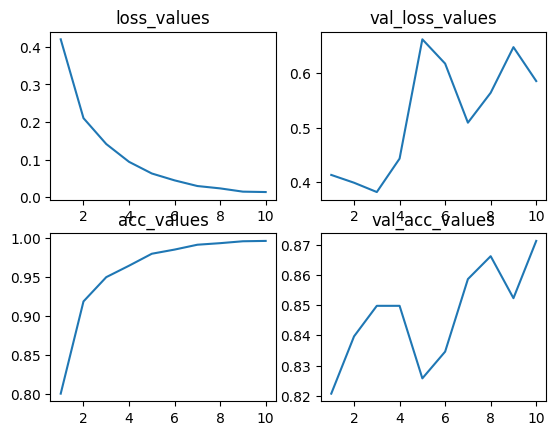

In [89]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss_values) + 1)

fig, axs = plt.subplots(2,2)

axs[0,0].plot(epochs, loss_values)
axs[0,0].set_title('loss_values')
axs[0,1].plot(epochs, val_loss_values)
axs[0,1].set_title('val_loss_values')
axs[1,0].plot(epochs, acc_values)
axs[1,0].set_title('acc_values')
axs[1,1].plot(epochs, val_acc_values)
axs[1,1].set_title('val_acc_values')

In [55]:
result = model.predict(x_test)
#result[result >= 0.5] = 1
#result[result < 0.5] = 0
result = np.argmax(result, axis=1)
result = (result >= 0.5).astype(int)
result = np.reshape(result, (-1, 1))

prediction = result.tolist()
prediction = [int(num[0]) for num in prediction]
result_df = pd.DataFrame({'id':test_data['image_id'].tolist(),'label':prediction})
result_df

42/42 [==============================] - 4s 82ms/step


,id,label
0,3483809003,1
1,3712805295,0
2,379845620,0
3,7343264988,1
4,3843337492,1
...,...,...
1315,6452132743,0
1316,244899140,0
1317,3073018258,1
1318,49525361,0


In [56]:
result_df.to_csv('result.csv', index = False)

In [57]:
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.models import Model
import tensorflow as tf

input_shape_img = (1,)
input_shape_text = (1,)

image_input = Input(shape=input_shape_img)
text_input = Input(shape=input_shape_text)

concat = tf.keras.layers.concatenate([image_input, text_input])

dense2 = Dense(32, activation='relu')(concat)
#dense2 = Dropout(0.5)(dense2)
output = Dense(1, activation='sigmoid')(dense2)

model_fin = Model(inputs=[image_input, text_input], outputs=output)
#model = Model(inputs=[image_input, title_input, desc_input, tag_input], outputs=output)

model_fin.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
from sklearn.model_selection import train_test_split

X_train_img, X_dev_img, X_train_text, X_dev_text, y_train, y_dev = \
            train_test_split(np.reshape((np.argmax(model.predict(x), axis=1) >= 0.5).astype(int), (-1, 1)),\
                             binary_train, \
                             np.reshape((np.argmax(y, axis=1) >= 0.5).astype(int), (-1, 1)), test_size=0.2)

165/165 [==============================] - 13s 80ms/step


In [ ]:
from sklearn.model_selection import train_test_split

X_train_img, X_dev_img, X_train_text, X_dev_text, y_train, y_dev = \
            train_test_split(np.reshape((np.argmax(model.predict(x), axis=1) >= 0.5).astype(int), (-1, 1)),\
                             svm_model.predict(X_train), \
                             np.reshape((np.argmax(y, axis=1) >= 0.5).astype(int), (-1, 1)), test_size=0.2)

In [38]:
binary_train.shape

(5280, 1)

In [59]:
history = model_fin.fit([X_train_img,X_train_text], y_train, \
                        validation_data=([X_dev_img,X_dev_text], y_dev), epochs=10, batch_size=32)

Epoch 1/10
132/132 [==============================] - 1s 3ms/step - loss: 0.5861 - accuracy: 0.9311 - val_loss: 0.4859 - val_accuracy: 0.9508
Epoch 2/10
132/132 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.9463 - val_loss: 0.3148 - val_accuracy: 0.9508
Epoch 3/10
132/132 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9463 - val_loss: 0.2269 - val_accuracy: 0.9508
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9463 - val_loss: 0.1885 - val_accuracy: 0.9508
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9463 - val_loss: 0.1718 - val_accuracy: 0.9508
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9463 - val_loss: 0.1627 - val_accuracy: 0.9508
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9463 - val_loss: 0.1568 - val_accuracy: 0.9508
Epoch 

In [60]:
result = model_fin.predict([np.reshape((np.argmax(model.predict(x_test), axis=1) >= 0.5).astype(int), (-1, 1)),\
                            binary_test])
result[result >= 0.5] = 1
result[result < 0.5] = 0

prediction = result.tolist()
prediction = [int(num[0]) for num in prediction]
result_df_fin = pd.DataFrame({'id':test_data['image_id'].tolist(),'label':prediction})
result_df_fin

42/42 [==============================] - 0s 1ms/step


,id,label
0,3483809003,1
1,3712805295,0
2,379845620,0
3,7343264988,1
4,3843337492,1
...,...,...
1315,6452132743,0
1316,244899140,0
1317,3073018258,0
1318,49525361,0


In [61]:
result_df_fin.to_csv('result_fin.csv',index=False)

In [62]:
result_df.compare(result_df_fin)


label      
      self other
63     1.0   0.0
88     1.0   0.0
304    1.0   0.0
367    1.0   0.0
436    1.0   0.0
530    1.0   0.0
667    1.0   0.0
889    1.0   0.0
987    1.0   0.0
1079   1.0   0.0
1100   1.0   0.0
1307   1.0   0.0
1317   1.0   0.0

⣿⣿⣿⣿⣿⣿⡷⣯⢿⣿⣷⣻⢯⣿⡽⣻⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⠸⣿⣿⣆⠹⣿⣿⢾⣟⣯⣿⣿⣿⣿⣿⣿⣽⣻⣿⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣿⣻⣽⡿⣿⣎⠙⣿⣞⣷⡌⢻⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣿⡄⠹⣿⣿⡆⠻⣿⣟⣯⡿⣽⡿⣿⣿⣿⣿⣽⡷⣯⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣿⣟⣷⣿⣿⣿⡀⠹⣟⣾⣟⣆⠹⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⢠⡘⣿⣿⡄⠉⢿⣿⣽⡷⣿⣻⣿⣿⣿⣿⡝⣷⣯⢿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣿⣯⢿⣾⢿⣿⡄⢄⠘⢿⣞⡿⣧⡈⢷⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⢸⣧⠘⣿⣷⠈⣦⠙⢿⣽⣷⣻⣽⣿⣿⣿⣿⣌⢿⣯⢿⣿⣿⣿ ⣿⣿⣿⣿⣿⣿⣟⣯⣿⢿⣿⡆⢸⡷⡈⢻⡽⣷⡷⡄⠻⣽⣿⣿⡿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣏⢰⣯⢷⠈⣿⡆⢹⢷⡌⠻⡾⢋⣱⣯⣿⣿⣿⣿⡆⢻⡿⣿⣿⣿ ⣿⣿⣿⣿⣿⣿⡎⣿⢾⡿⣿⡆⢸⣽⢻⣄⠹⣷⣟⣿⣄⠹⣟⣿⣿⣟⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⡇⢸⣯⣟⣧⠘⣷⠈⡯⠛⢀⡐⢾⣟⣷⣻⣿⣿⣿⡿⡌⢿⣻⣿⣿ ⣿⣿⣿⣿⣿⣿⣧⢸⡿⣟⣿⡇⢸⣯⣟⣮⢧⡈⢿⣞⡿⣦⠘⠏⣹⣿⣽⢿⣿⣿⣿⣿⣯⣿⣿⣿⡇⢸⣿⣿⣾⡆⠹⢀⣠⣾⣟⣷⡈⢿⣞⣯⢿⣿⣿⣿⢷⠘⣯⣿⣿ ⣿⣿⣿⣿⣿⣿⣿⡈⣿⢿⣽⡇⠘⠛⠛⠛⠓⠓⠈⠛⠛⠟⠇⢀⢿⣻⣿⣯⢿⣿⣿⣿⣷⢿⣿⣿⠁⣾⣿⣿⣿⣧⡄⠇⣹⣿⣾⣯⣿⡄⠻⣽⣯⢿⣻⣿⣿⡇⢹⣾⣿ ⣿⣿⣿⣿⣿⣿⣿⡇⢹⣿⡽⡇⢸⣿⣿⣿⣿⣿⣞⣆⠰⣶⣶⡄⢀⢻⡿⣯⣿⡽⣿⣿⣿⢯⣟⡿⢀⣿⣿⣿⣿⣿⣧⠐⣸⣿⣿⣷⣿⣿⣆⠹⣯⣿⣻⣿⣿⣿⢀⣿⢿ ⣿⣿⣿⣿⣿⣿⣿⣿⠘⣯⡿⡇⢸⣿⣿⣿⣿⣿⣿⣿⣧⡈⢿⣳⠘⡄⠻⣿⢾⣽⣟⡿⣿⢯⣿⡇⢸⣿⣿⣿⣿⣿⣿⡀⢾⣿⣿⣿⣿⣿⣿⣆⠹⣾⣷⣻⣿⡿⡇⢸⣿ ⣿⣿⣿⣿⣿⣿⣿⣿⡇⢹⣿⠇⢸⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠻⡇⢹⣆⠹⣟⣾⣽⣻⣟⣿⣽⠁⣾⣿⣿⣿⣿⣿⣿⣇⣿⣿⠿⠛⠛⠉⠙⠋⢀⠁⢘⣯⣿⣿⣧⠘⣿ ⣿⣿⣿⣿⣿⣿⣿⣿⣿⡈⣿⡃⢼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⡙⠌⣿⣆⠘⣿⣞⡿⣞⡿⡞⢠⣿⣿⣿⣿⣿⡿⠛⠉⠁⢀⣀⣠⣤⣤⣶⣶⣶⡆⢻⣽⣞⡿⣷⠈⣿ ⣿⣿⣿⣿⣿⣿⣿⣿⡿⠃⠘⠁⠉⠉⠉⠉⠉⠉⠉⠉⠉⠙⠛⠛⢿⣄⢻⣿⣧⠘⢯⣟⡿⣽⠁⣾⣿⣿⣿⣿⣿⡃⢀⢀⠘⠛⠿⢿⣻⣟⣯⣽⣻⣵⡀⢿⣯⣟⣿⢀⣿ ⣿⣿⣿⣟⣿⣿⣿⣿⣶⣶⡆⢀⣿⣾⣿⣾⣷⣿⣶⠿⠚⠉⢀⢀⣤⣿⣷⣿⣿⣷⡈⢿⣻⢃⣼⣿⣿⣿⣿⣻⣿⣿⣿⡶⣦⣤⣄⣀⡀⠉⠛⠛⠷⣯⣳⠈⣾⡽⣾⢀⣿ ⣿⢿⣿⣿⣻⣿⣿⣿⣿⣿⡿⠐⣿⣿⣿⣿⠿⠋⠁⢀⢀⣤⣾⣿⣿⣿⣿⣿⣿⣿⣿⣌⣥⣾⡿⣿⣿⣷⣿⣿⢿⣷⣿⣿⣟⣾⣽⣳⢯⣟⣶⣦⣤⡾⣟⣦⠘⣿⢾⡁⢺ ⣿⣻⣿⣿⡷⣿⣿⣿⣿⣿⡗⣦⠸⡿⠋⠁⢀⢀⣠⣴⢿⣿⣽⣻⢽⣾⣟⣷⣿⣟⣿⣿⣿⣳⠿⣵⣧⣼⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣽⣳⣯⣿⣿⣿⣽⢀⢷⣻⠄⠘ ⣿⢷⣻⣿⣿⣷⣻⣿⣿⣿⡷⠛⣁⢀⣀⣤⣶⣿⣛⡿⣿⣮⣽⡻⣿⣮⣽⣻⢯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⢀⢸⣿⢀⡆ ⠸⣟⣯⣿⣿⣷⢿⣽⣿⣿⣷⣿⣷⣆⠹⣿⣶⣯⠿⣿⣶⣟⣻⢿⣷⣽⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢀⣯⣟⢀⡇ ⣇⠹⣟⣾⣻⣿⣿⢾⡽⣿⣿⣿⣿⣿⣆⢹⣶⣿⣻⣷⣯⣟⣿⣿⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⢀⡿⡇⢸⡇ ⣿⣆⠹⣷⡻⣽⣿⣯⢿⣽⣻⣿⣿⣿⣿⣆⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠛⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⢸⣿⠇⣼⡇ ⡙⠾⣆⠹⣿⣦⠛⣿⢯⣷⢿⡽⣿⣿⣿⣿⣆⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠃⠎⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⢀⣿⣾⣣⡿⡇ ⣿⣷⡌⢦⠙⣿⣿⣌⠻⣽⢯⣿⣽⣻⣿⣿⣿⣧⠩⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡏⢰⢣⠘⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠃⢀⢀⢿⣞⣷⢿⡇ ⣿⣽⣆⠹⣧⠘⣿⣿⡷⣌⠙⢷⣯⡷⣟⣿⣿⣿⣷⡀⡹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣈⠃⣸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠟⢀⣴⡧⢀⠸⣿⡽⣿⢀ ⢻⣽⣿⡄⢻⣷⡈⢿⣿⣿⢧⢀⠙⢿⣻⡾⣽⣻⣿⣿⣄⠌⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠛⢁⣰⣾⣟⡿⢀⡄⢿⣟⣿⢀ ⡄⢿⣿⣷⢀⠹⣟⣆⠻⣿⣿⣆⢀⣀⠉⠻⣿⡽⣯⣿⣿⣷⣈⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠋⢀⣠⠘⣯⣷⣿⡟⢀⢆⠸⣿⡟⢸ ⣷⡈⢿⣿⣇⢱⡘⢿⣷⣬⣙⠿⣧⠘⣆⢀⠈⠻⣷⣟⣾⢿⣿⣆⠹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠋⣠⡞⢡⣿⢀⣿⣿⣿⠇⡄⢸⡄⢻⡇⣼ ⣿⣷⡈⢿⣿⡆⢣⡀⠙⢾⣟⣿⣿⣷⡈⠂⠘⣦⡈⠿⣯⣿⢾⣿⣆⠙⠻⠿⠿⠿⠿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⠛⢋⣠⣾⡟⢠⣿⣿⢀⣿⣿⡟⢠⣿⢈⣧⠘⢠⣿ ⣿⣿⣿⣄⠻⣿⡄⢳⡄⢆⡙⠾⣽⣿⣿⣆⡀⢹⡷⣄⠙⢿⣿⡾⣿⣆⢀⡀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⢀⣀⣠⣴⡿⣯⠏⣠⣿⣿⡏⢸⣿⡿⢁⣿⣿⢀⣿⠆⢸⣿ ⣿⣿⣿⣿⣦⡙⣿⣆⢻⡌⢿⣶⢤⣉⣙⣿⣷⡀⠙⠽⠷⠄⠹⣿⣟⣿⣆⢙⣋⣤⣤⣤⣄⣀⢀⢀⢀⢀⣾⣿⣟⡷⣯⡿⢃⣼⣿⣿⣿⠇⣼⡟⣡⣿⣿⣿⢀⡿⢠⠈⣿ ⣿⣿⣿⣿⣿⣷⣮⣿⣿⣿⡌⠁⢤⣤⣤⣤⣬⣭⣴⣶⣶⣶⣆⠈⢻⣿⣿⣆⢻⣿⣿⣿⣿⣿⣿⣷⣶⣤⣌⣉⡘⠛⠻⠶⣿⣿⣿⣿⡟⣰⣫⣴⣿⣿⣿⣿⠄⣷⣿⣿⣿

In [11]:
y.shape

(5280, 1)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

augmented_data = []
augmented_labels = []

for x_batch, y_batch in datagen.flow(x, y, batch_size=1):
    augmented_data.append(x_batch)
    augmented_labels.append(y_batch)
    if len(augmented_data) == 20000:
        break
        
x_aug = np.concatenate(augmented_data)
y_aug = np.concatenate(augmented_labels)


In [46]:
y_aug.shape

(20000, 1)

In [13]:
np.save('x_aug.npy', x)
np.save('y_aug.npy', y)

In [2]:
x = np.load('x_aug.npy')
y = np.load('y_aug.npy')

In [47]:
import tensorflow as tf
from keras.utils import to_categorical
y_aug = tf.keras.utils.to_categorical(y_aug)
y = tf.keras.utils.to_categorical(y)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = \
            train_test_split(x_aug, y_aug, test_size=0.15)

In [50]:
X_train.shape

(17000, 150, 150, 3)

In [51]:
import tensorflow as tf
import tensorflow.keras.applications.mobilenet_v2 as mobilenet_v2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow.keras.optimizers as optimizers

input_shape = (150, 150, 3)

base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

#resnet.layers[0].trainable = False

model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

sgd = optimizers.legacy.SGD(learning_rate = 0.001, decay = 3e-6, momentum = 0.85, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=10, batch_size=64)

Epoch 1/10
266/266 [==============================] - 207s 761ms/step - loss: 0.3684 - accuracy: 0.8302 - val_loss: 0.4146 - val_accuracy: 0.8223
Epoch 2/10
266/266 [==============================] - 207s 780ms/step - loss: 0.1988 - accuracy: 0.9193 - val_loss: 0.3042 - val_accuracy: 0.8767
Epoch 3/10
266/266 [==============================] - 199s 749ms/step - loss: 0.1237 - accuracy: 0.9537 - val_loss: 0.2622 - val_accuracy: 0.9007
Epoch 4/10
266/266 [==============================] - 197s 739ms/step - loss: 0.0728 - accuracy: 0.9744 - val_loss: 0.2540 - val_accuracy: 0.9093
Epoch 5/10
266/266 [==============================] - 196s 737ms/step - loss: 0.0391 - accuracy: 0.9890 - val_loss: 0.2470 - val_accuracy: 0.9197
Epoch 6/10
266/266 [==============================] - 196s 735ms/step - loss: 0.0209 - accuracy: 0.9950 - val_loss: 0.2439 - val_accuracy: 0.9227
Epoch 7/10
266/266 [==============================] - 195s 733ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.2536 -

In [53]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

Text(0.5, 1.0, 'val_acc_values')

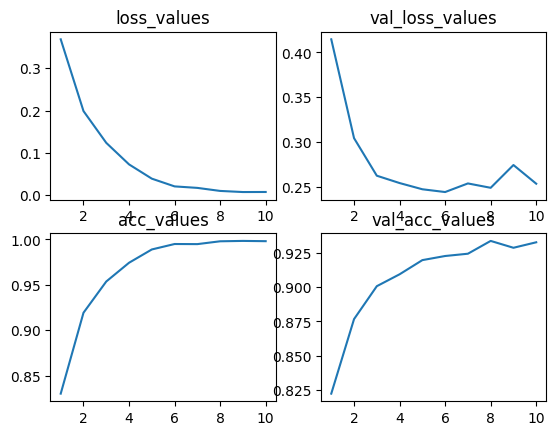

In [54]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss_values) + 1)

fig, axs = plt.subplots(2,2)

axs[0,0].plot(epochs, loss_values)
axs[0,0].set_title('loss_values')
axs[0,1].plot(epochs, val_loss_values)
axs[0,1].set_title('val_loss_values')
axs[1,0].plot(epochs, acc_values)
axs[1,0].set_title('acc_values')
axs[1,1].plot(epochs, val_acc_values)
axs[1,1].set_title('val_acc_values')